# CLIENT PROJECT :- PRCL-0017- NO-CHURN TELECOM

# PROJECT TEAM ID :- PTID-CDS-AUG-23-1605

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Business case

**No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the market, the telecom industry has become very competitive, and retaining customers is becoming a challenge.
In spite of No-Churn's initiatives of reducing tariffs and promoting more offers, the churn rate (percentage of customers migrating to competitors) is well above 10%. No-Churn wants to explore the possibility of Machine Learning to help with the following use cases to retain a competitive edge in the industry.**

## Domain Analysis

The dataset comprises of a total of 21 columns and 4617 rows

1. **State**: The state in the USA to which the account belongs.
2. **Account Length**: The number of days the customer has been with the dedicated brand.
3. **Area Code**: The area code where the customer resides.
4. **Phone**: A unique identifier for the customer.
5. **International Plan**: Indicates whether the customer has an international plan or not.
6. **VMail Plan**: Indicates whether the customer has a voice mail plan.
7. **VMail Message**: The number of voice mail inbox messages the customer has.
8. **Day Mins**: The total number of daytime minutes the customer has used.
9. **Day Calls**: The number of calls the customer made during the day.
10. **Day Charge**: The total expenses incurred by the customer for daytime usage.
11. **Eve Mins**: The total number of evening minutes the customer has used.
12. **Eve Calls**: The number of calls the customer made during the evening.
13. **Eve Charge**: The total expenses incurred by the customer for evening usage.
14. **Night Mins**: The total number of nighttime minutes the customer has used.
15. **Night Calls**: The number of calls the customer made during the night.
16. **Night Charge**: The total expenses incurred by the customer for nighttime usage.
17. **International Mins**: The total number of international minutes the customer has used.
18. **International Calls**: The number of international calls the customer made.
19. **International Charge**: The total expenses incurred by the customer for international usage.
20. **CustServ Calls**: The number of calls made by the customer to customer service.
21. **Churn**: It likely indicates whether the customer has churned (cancelled their service) or not.

## Import Basic Libraries

In [2]:
pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247952 sha256=8fba73d28501f55275fc78c97e38c7d69f3447f5b48c8a53f98ac564e631f270
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector


In [3]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset through SQL

In [4]:
db = mysql.connector.connect(host = '18.136.157.135',
                            user = 'dm_team3',
                            password = 'DM!$!Team!27@9!20&',
                            database = 'project_telecom')

In [5]:
table = pd.read_sql_query('show tables',db)
print(table)

  Tables_in_project_telecom
0        telecom_churn_data


In [6]:
table_name = 'telecom_churn_data'
table_details = pd.read_sql_query(f'DESCRIBE {table_name}', db)
print(table_details)

        Field          Type Null Key Default Extra
0    columns1  varchar(555)  YES        None      
1    columns2  varchar(555)  YES        None      
2    columns3  varchar(555)  YES        None      
3    columns4  varchar(555)  YES        None      
4    columns5  varchar(555)  YES        None      
5    columns6  varchar(555)  YES        None      
6    columns7  varchar(555)  YES        None      
7    columns8  varchar(555)  YES        None      
8    columns9  varchar(555)  YES        None      
9   columns10  varchar(555)  YES        None      
10  columns11  varchar(555)  YES        None      
11  columns12  varchar(555)  YES        None      
12  columns13  varchar(555)  YES        None      
13  columns14  varchar(555)  YES        None      
14  columns15  varchar(555)  YES        None      
15  columns16  varchar(555)  YES        None      
16  columns17  varchar(555)  YES        None      
17  columns18  varchar(555)  YES        None      
18  columns19  varchar(555)  YE

In [7]:
query = 'select * from telecom_churn_data'
churn_data = pd.read_sql(query, db)
print(churn_data)

     columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       265.1      110     45.07  ...     

In [8]:
# To see all the rows
pd.set_option("display.max_rows",None)
pd.set_option("display.max_column",None)
churn_data

Output hidden; open in https://colab.research.google.com to view.

### Inference
**1. the total number of rows are 4616 and columns of 21 including the final target.**

**2. the column names were unnamed properly, and it has been converted accordingly.**

In [9]:
churn_data.rename(columns={'columns1':'state','columns2':'account_length',
                          'columns3':'area_code','columns4':'phone','columns5':'international_plan',
                          'columns6':'vmail_plan','columns7':'vmail_message','columns8':'day_mins',
                          'columns9':'day_calls','columns10':'day_charge','columns11':'eve_mins',
                          'columns12':'eve_calls','columns13':'eve_charge','columns14':'night_mins',
                          'columns15':'night_calls','columns16':'night_charge','columns17':'international_mins',
                          'columns18':'international_calls','columns19':'international_charge','columns20':'custserv_calls',
                          'columns21':'churn'}, inplace=True)

In [10]:
churn_data

Output hidden; open in https://colab.research.google.com to view.

In [11]:
churn_data.columns

Index(['state', 'account_length', 'area_code', 'phone', 'international_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charge', 'international_mins', 'international_calls',
       'international_charge', 'custserv_calls', 'churn'],
      dtype='object')

In [12]:
churn_data.describe()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls,churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,1833,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,169.9,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,10,111,15,10,115,19,81,925,81,1651,3961


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 4617 non-null   object
 1   account_length        4617 non-null   object
 2   area_code             4617 non-null   object
 3   phone                 4617 non-null   object
 4   international_plan    4617 non-null   object
 5   vmail_plan            4617 non-null   object
 6   vmail_message         4617 non-null   object
 7   day_mins              4617 non-null   object
 8   day_calls             4617 non-null   object
 9   day_charge            4617 non-null   object
 10  eve_mins              4617 non-null   object
 11  eve_calls             4617 non-null   object
 12  eve_charge            4617 non-null   object
 13  night_mins            4617 non-null   object
 14  night_calls           4617 non-null   object
 15  night_charge          4617 non-null   

### inference
**1. certain data supposed to be in interger and float type.**

**2. next step we convert the specified columns into their respective type**

In [13]:
object_to_integer = ['account_length', 'area_code', 'vmail_message','day_calls',
                    'eve_calls','night_calls','international_calls','custserv_calls']

for column in object_to_integer:
    churn_data[column] = pd.to_numeric(churn_data[column], errors='coerce', downcast='integer')

In [14]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 4617 non-null   object
 1   account_length        4617 non-null   int16 
 2   area_code             4617 non-null   int16 
 3   phone                 4617 non-null   object
 4   international_plan    4617 non-null   object
 5   vmail_plan            4617 non-null   object
 6   vmail_message         4617 non-null   int8  
 7   day_mins              4617 non-null   object
 8   day_calls             4617 non-null   int16 
 9   day_charge            4617 non-null   object
 10  eve_mins              4617 non-null   object
 11  eve_calls             4617 non-null   int16 
 12  eve_charge            4617 non-null   object
 13  night_mins            4617 non-null   object
 14  night_calls           4617 non-null   int16 
 15  night_charge          4617 non-null   

In [15]:
object_to_float = ['day_mins', 'day_charge', 'eve_mins','eve_charge','night_mins',
                  'night_charge','international_mins','international_charge']

for column in object_to_float:
    churn_data[column] = pd.to_numeric(churn_data[column], errors='coerce')

In [16]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 4617 non-null   object 
 1   account_length        4617 non-null   int16  
 2   area_code             4617 non-null   int16  
 3   phone                 4617 non-null   object 
 4   international_plan    4617 non-null   object 
 5   vmail_plan            4617 non-null   object 
 6   vmail_message         4617 non-null   int8   
 7   day_mins              4617 non-null   float64
 8   day_calls             4617 non-null   int16  
 9   day_charge            4617 non-null   float64
 10  eve_mins              4617 non-null   float64
 11  eve_calls             4617 non-null   int16  
 12  eve_charge            4617 non-null   float64
 13  night_mins            4617 non-null   float64
 14  night_calls           4617 non-null   int16  
 15  night_charge         

In [17]:
churn_data.duplicated().sum()

0

In [ ]:
churn_data.describe()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
churn_data.isnull().sum()

state                   0
account_length          0
area_code               0
phone                   0
international_plan      0
vmail_plan              0
vmail_message           0
day_mins                0
day_calls               0
day_charge              0
eve_mins                0
eve_calls               0
eve_charge              0
night_mins              0
night_calls             0
night_charge            0
international_mins      0
international_calls     0
international_charge    0
custserv_calls          0
churn                   0
dtype: int64

In [19]:
state_churn = churn_data.groupby('state')['churn'].value_counts().unstack().fillna(0)
state_churn

churn,False.,True.
state,,
AK,64,5
AL,104,10
AR,62,15
AZ,74,7
CA,31,13
CO,81,10
CT,78,14
DC,73,9
DE,75,14


In [ ]:
churn_data.state.value_counts()

WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: state, dtype: int64

## Data Visualization

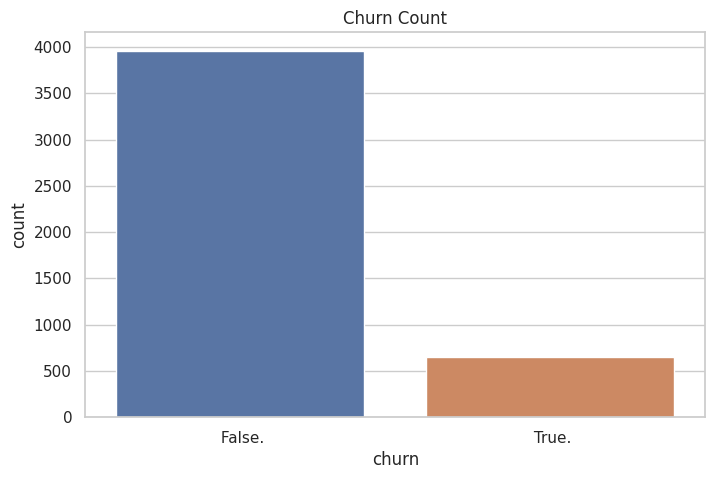

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=churn_data, x="churn")
plt.title("Churn Count")
plt.show()

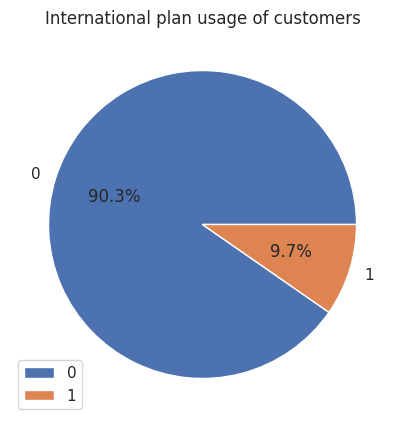

In [ ]:
#INTERNATIONAL PALN
y=churn_data['international_plan'].value_counts()
plt.figure(figsize=(5,5))
labels=['0','1']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('International plan usage of customers')
plt.show()

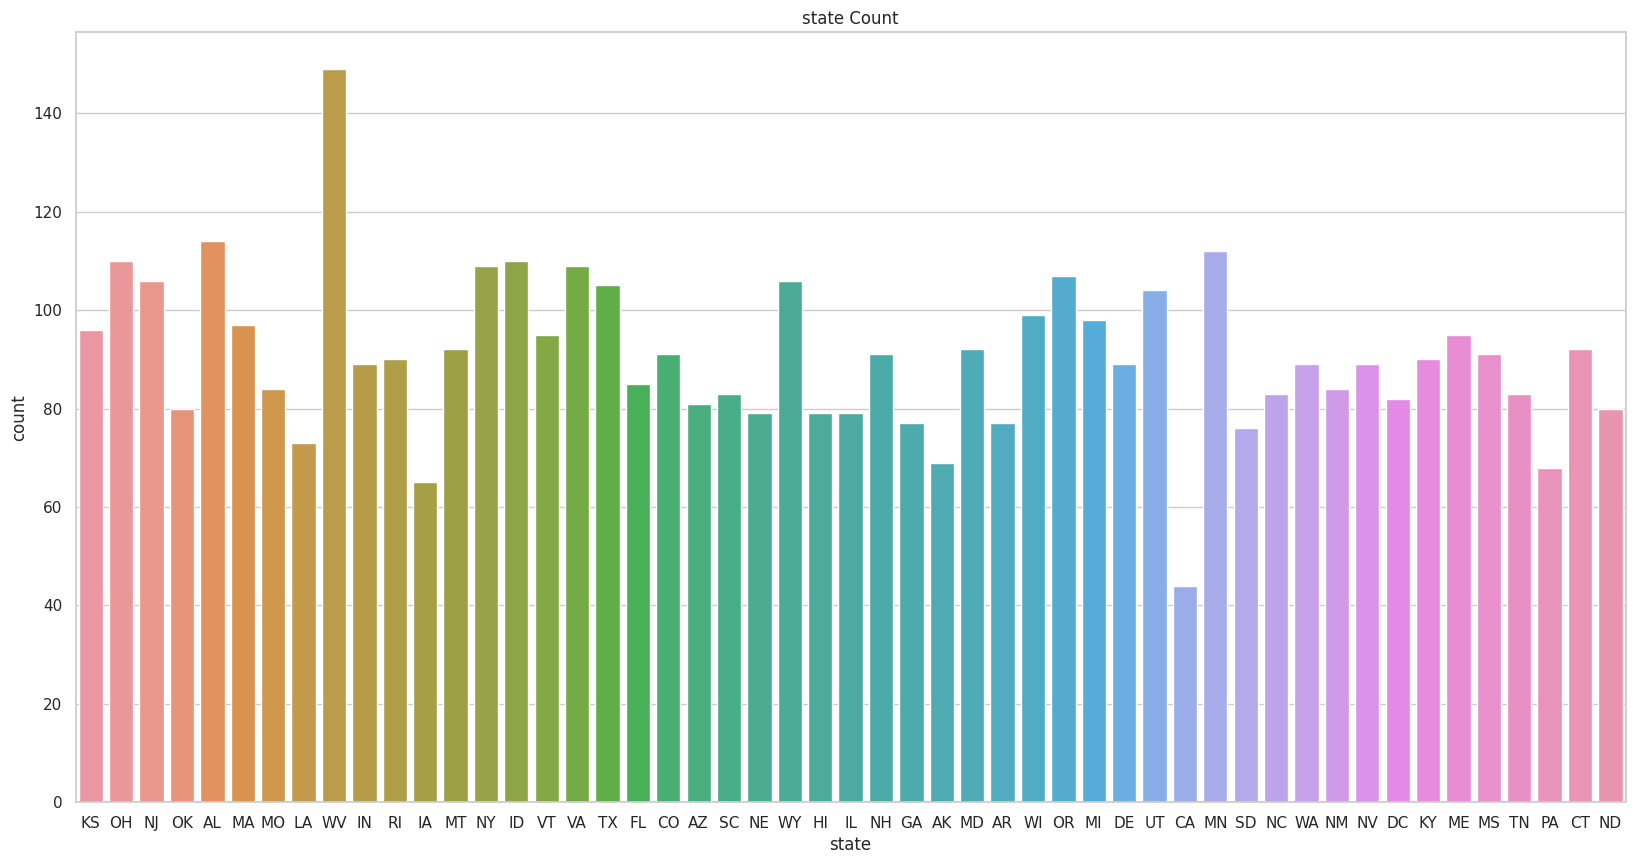

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=churn_data, x="state")
plt.title("state Count")
plt.show()

<Axes: xlabel='custserv_calls', ylabel='count'>

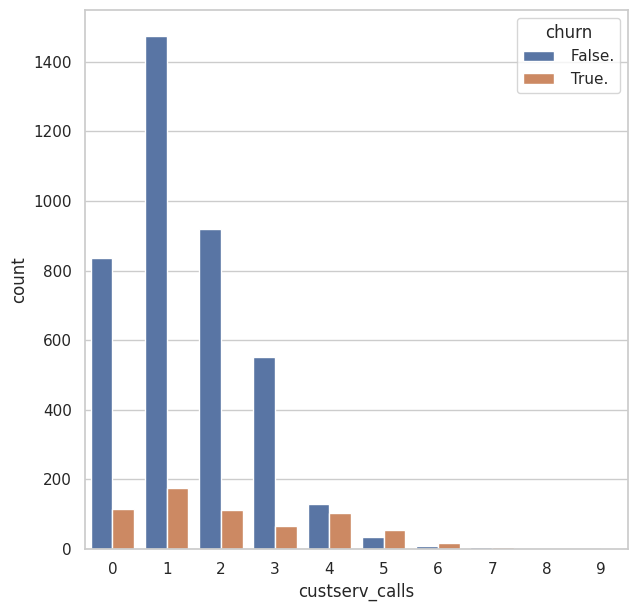

In [ ]:
plt.figure(figsize=(7,7))

sns.countplot(x="custserv_calls", hue="churn", data=churn_data)

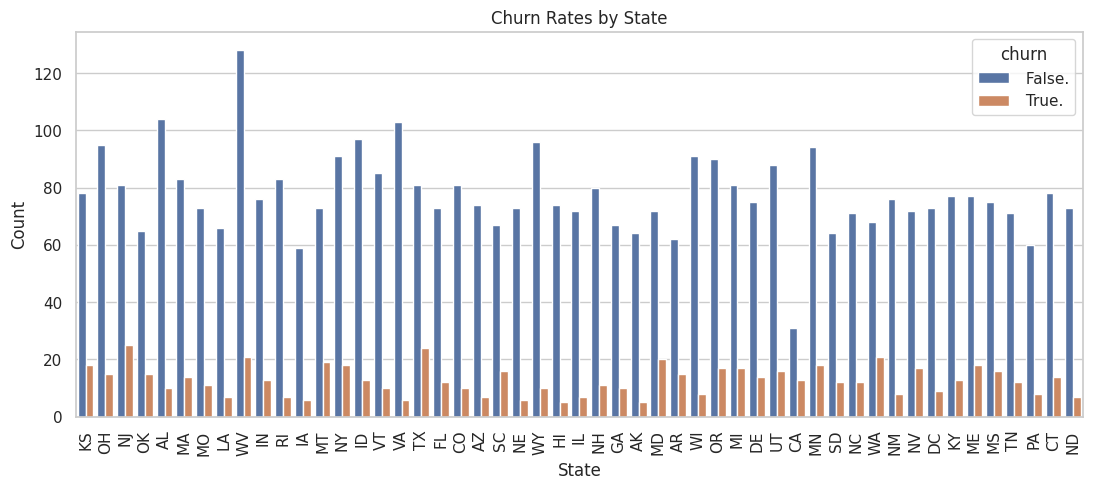

In [ ]:
plt.figure(figsize=(13, 5))
sns.countplot(data=churn_data, x='state', hue='churn')
plt.title('Churn Rates by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

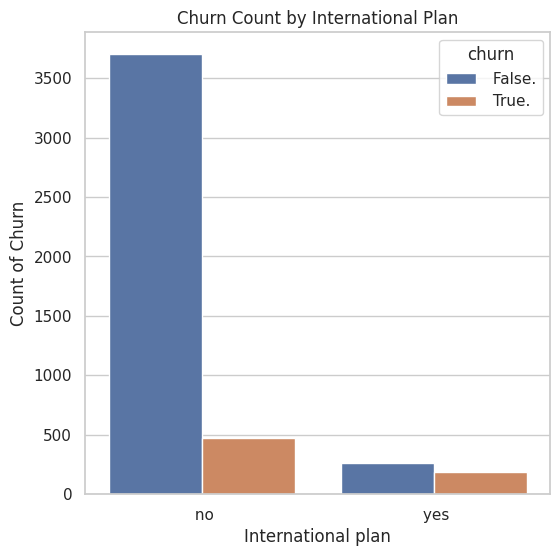

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='international_plan',data=churn_data,hue='churn')
plt.xlabel('International plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by International Plan')
plt.show()

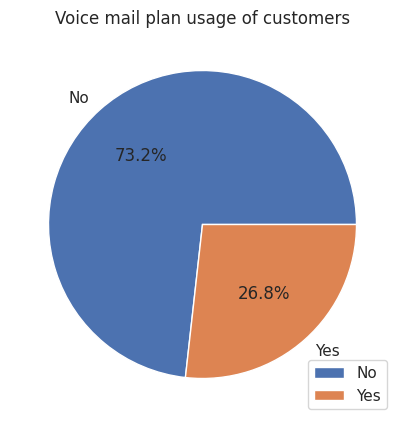

In [ ]:
#Voice mail plan
y=churn_data['vmail_plan'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Voice mail plan usage of customers')
plt.show()

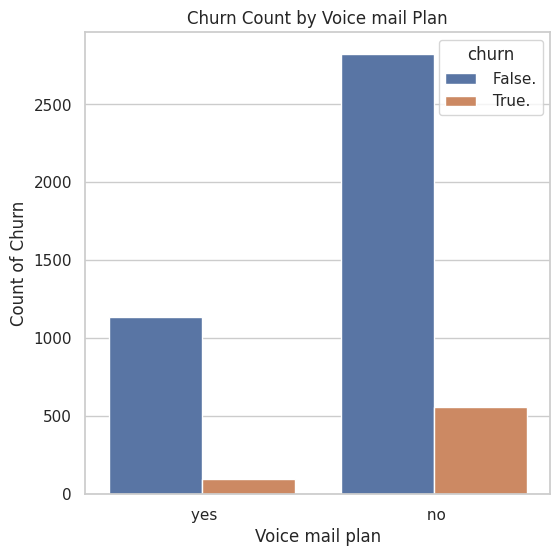

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='vmail_plan',data=churn_data,hue='churn')
plt.xlabel('Voice mail plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by Voice mail Plan')
plt.show()

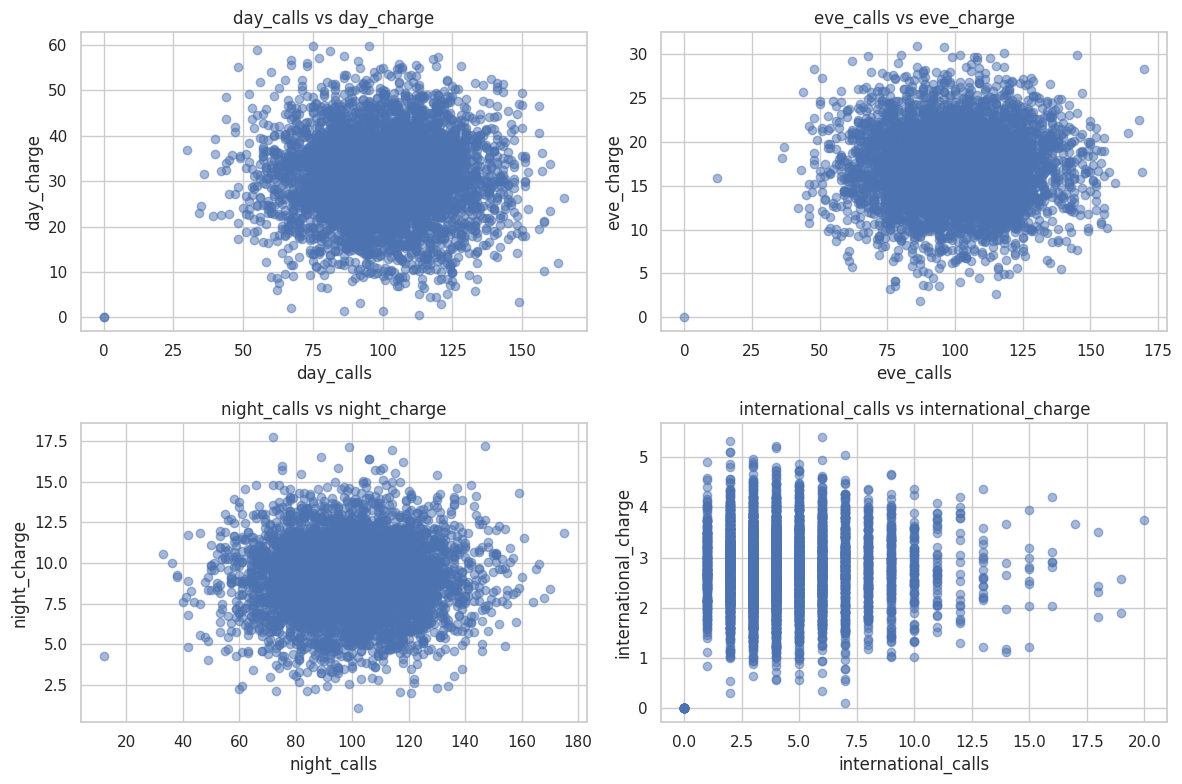

In [ ]:
calls_columns = ['day_calls', 'eve_calls', 'night_calls', 'international_calls']
charge_columns = ['day_charge', 'eve_charge', 'night_charge', 'international_charge']


plt.figure(figsize=(12, 8))
for i in range(len(calls_columns)):
    plt.subplot(2, 2, i+1)
    plt.scatter(churn_data[calls_columns[i]], churn_data[charge_columns[i]], alpha=0.5)
    plt.title(f'{calls_columns[i]} vs {charge_columns[i]}')
    plt.xlabel(calls_columns[i])
    plt.ylabel(charge_columns[i])

plt.tight_layout()
plt.show()

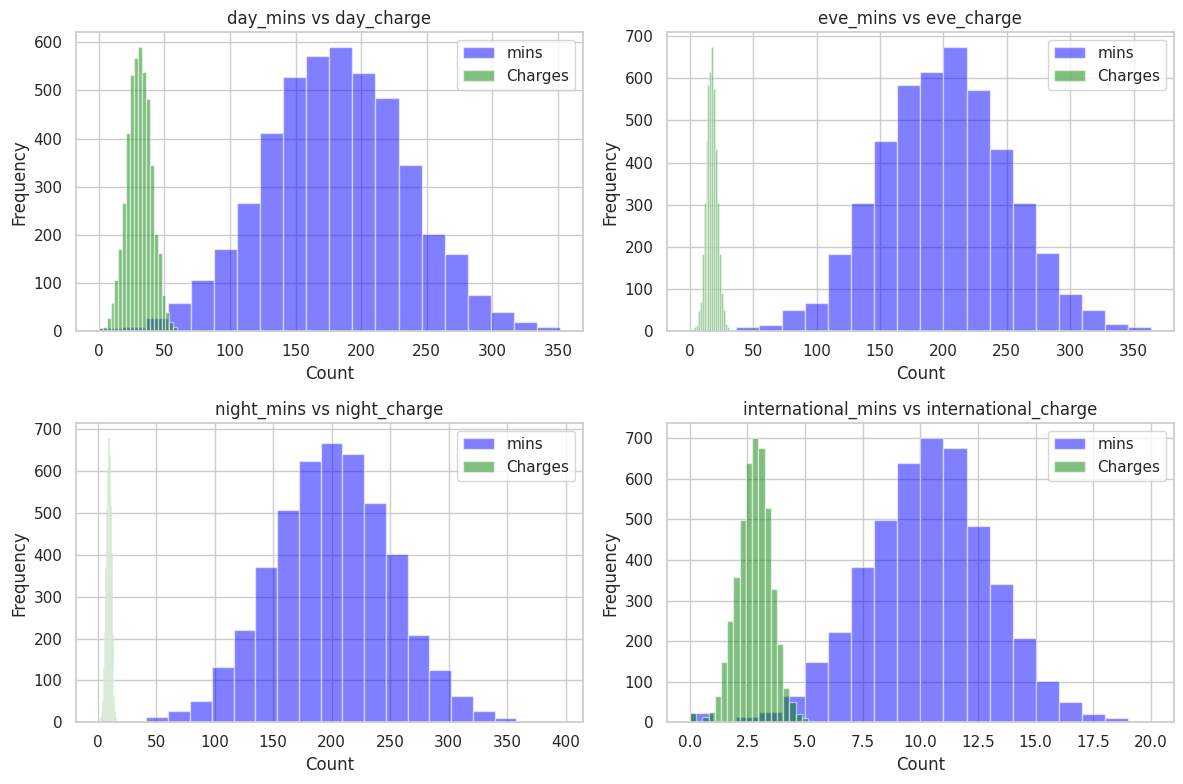

In [ ]:
plt.figure(figsize=(12, 8))
mins_columns = ['day_mins', 'eve_mins', 'night_mins', 'international_mins']
charge_columns = ['day_charge', 'eve_charge', 'night_charge', 'international_charge']

for i in range(len(calls_columns)):
    plt.subplot(2, 2, i+1)
    plt.hist(churn_data[mins_columns[i]], bins=20, alpha=0.5, label='mins', color='blue')
    plt.hist(churn_data[charge_columns[i]], bins=20, alpha=0.5, label='Charges', color='green')
    plt.title(f'{mins_columns[i]} vs {charge_columns[i]}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
cost_per_minute_day = churn_data['day_charge'] / churn_data['day_mins']
cost_per_minute_evening = churn_data['eve_charge'] / churn_data['eve_mins']
cost_per_minute_night = churn_data['night_charge'] / churn_data['night_mins']
cost_per_minute_international = churn_data['international_charge'] / churn_data['international_mins']

average_cost_day = cost_per_minute_day.mean()
average_cost_evening = cost_per_minute_evening.mean()
average_cost_night = cost_per_minute_night.mean()
average_cost_international = cost_per_minute_international.mean()


print(f'Average Cost per Minute (Day): {average_cost_day:.2f}')
print(f'Average Cost per Minute (Evening): {average_cost_evening:.2f}')
print(f'Average Cost per Minute (Night): {average_cost_night:.2f}')
print(f'Average Cost per Minute (International): {average_cost_international:.2f}')

Average Cost per Minute (Day): 0.17
Average Cost per Minute (Evening): 0.09
Average Cost per Minute (Night): 0.05
Average Cost per Minute (International): 0.27


* **we can anylyse from this situation that these values cannot be clubbed together as they can play a significant role in the churn prediction**

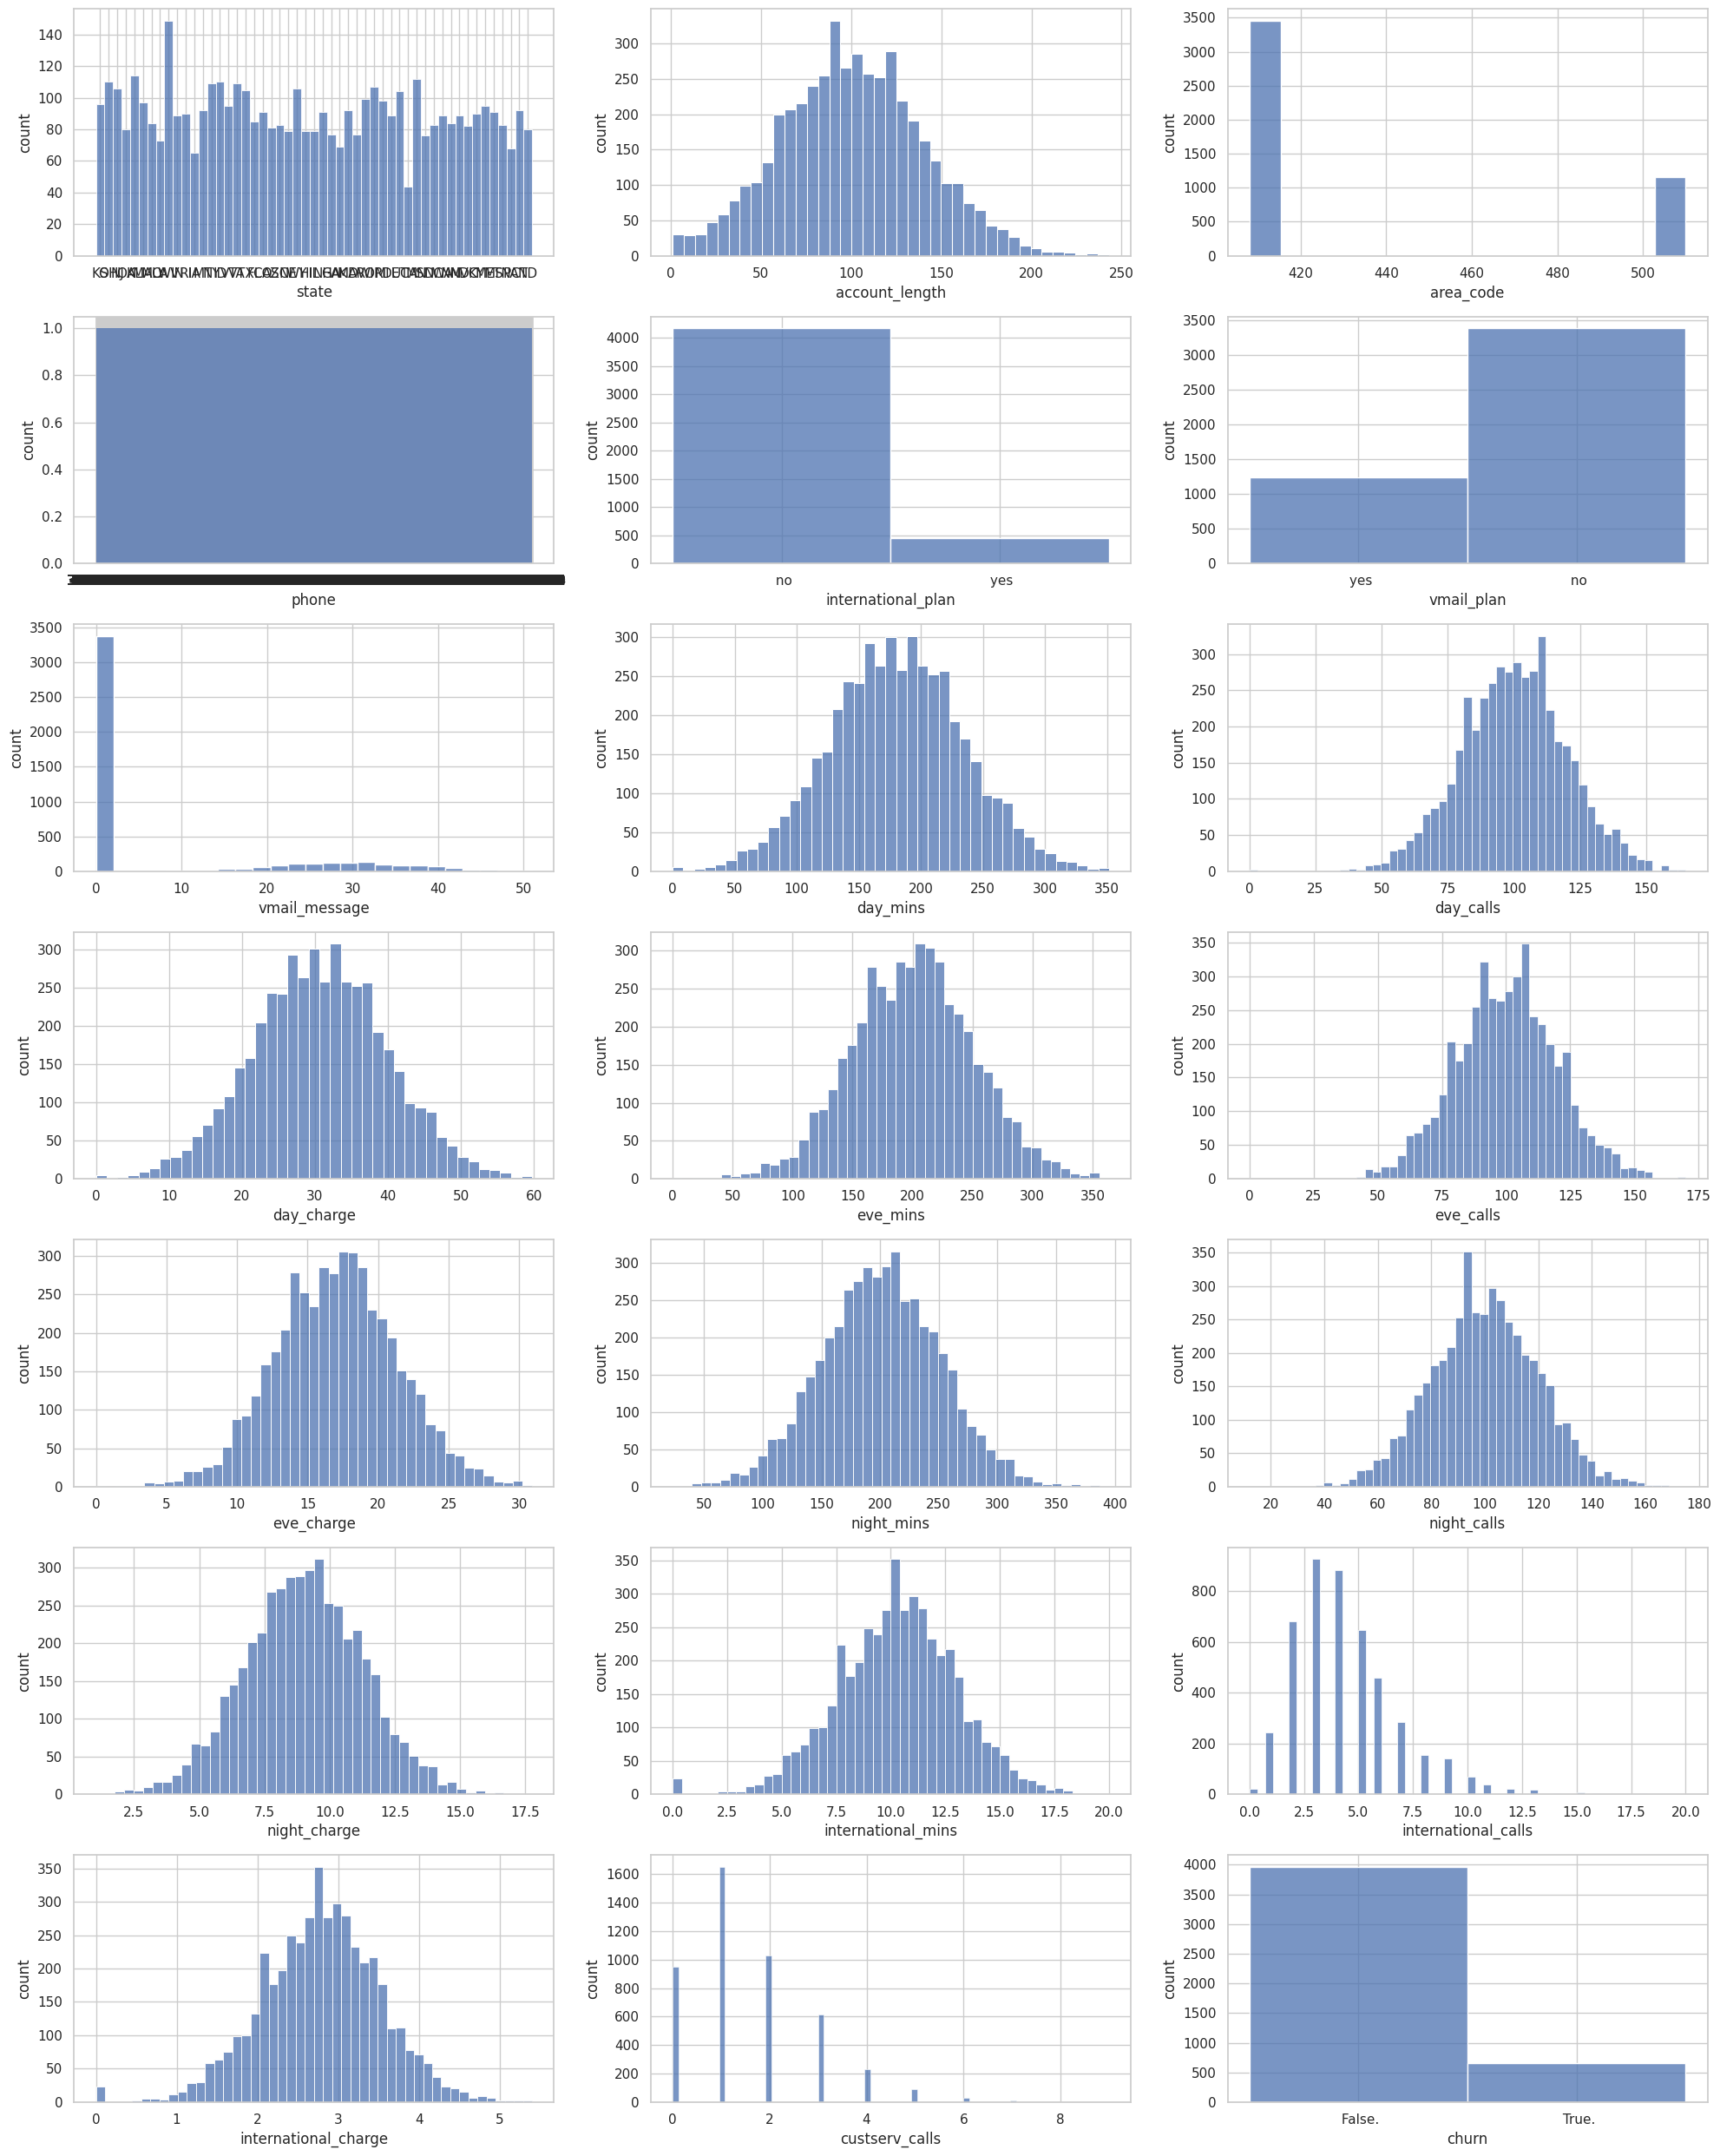

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
pltno =1

for column in churn_data:
    if pltno<=21:
        ax=plt.subplot(7,3,pltno)
        sns.histplot(churn_data[column])
        plt.xlabel(column)
        plt.ylabel('count')
    pltno+=1
plt.tight_layout()

* **almost all of them are skewed normally also can be understood as zero skewness**

In [ ]:
sns.pairplot(churn_data, hue='churn', diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* **it can be seen the higher the values it goes the more orange that is TRUE is witnessed indicating the high chnace of churn with more usage and spending**

### converting categorical to nunmerical  

In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [21]:
churn_data['churn'] = lb.fit_transform(churn_data['churn'])
churn_data['international_plan'] = lb.fit_transform(churn_data['international_plan'])
churn_data['vmail_plan'] = lb.fit_transform(churn_data['vmail_plan'])
churn_data['state']=lb.fit_transform(churn_data['state'])

In [22]:
churn_data

Output hidden; open in https://colab.research.google.com to view.

In [23]:
state_churn = churn_data.groupby('state')['churn'].value_counts().unstack().fillna(0)

state_churn['total_count'] = state_churn[0] + state_churn[1]
state_churn = state_churn.sort_values(by='total_count', ascending=False)
state_churn

churn,0,1,total_count
state,,,
49,128,21,149
1,104,10,114
23,94,18,112
13,97,13,110
35,95,15,110
34,91,18,109
45,103,6,109
37,90,17,107
31,81,25,106


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 4617 non-null   int64  
 1   account_length        4617 non-null   int16  
 2   area_code             4617 non-null   int16  
 3   phone                 4617 non-null   object 
 4   international_plan    4617 non-null   int64  
 5   vmail_plan            4617 non-null   int64  
 6   vmail_message         4617 non-null   int8   
 7   day_mins              4617 non-null   float64
 8   day_calls             4617 non-null   int16  
 9   day_charge            4617 non-null   float64
 10  eve_mins              4617 non-null   float64
 11  eve_calls             4617 non-null   int16  
 12  eve_charge            4617 non-null   float64
 13  night_mins            4617 non-null   float64
 14  night_calls           4617 non-null   int16  
 15  night_charge         

In [ ]:
churn_data.account_length.unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
        95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
        54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
        34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
       125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
       144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
       157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
       140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
       179,  67,  19, 170, 164,  51, 208,  53, 105,  66,  86,  35,  88,
       123,  45, 100, 215,  22,  33, 114,  24, 101, 143,  48,  71, 167,
        89, 199, 166, 158, 196, 209,  16,  39, 173, 129,  44,  79,  31,
       124,  37, 159, 194, 154,  21, 133, 224,  58,  11, 109, 102, 165,
        18,  30, 176,  47, 190, 152,  26,  69, 186, 171,  28, 153, 169,
        13,  27,   3,  42, 189, 156, 134, 243,  23,   1, 205, 20

In [24]:
unique_account_lengths = churn_data['account_length'].unique()
sorted_account_lengths = sorted(unique_account_lengths)
print(sorted_account_lengths)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 204, 205, 208, 209, 210, 212, 215, 216, 217, 221, 222, 224, 225, 232, 233, 238, 243]


In [25]:
unique_area_code = churn_data['area_code'].unique()
sorted_area_code = sorted(unique_area_code)
print(sorted_area_code)

[408, 415, 510]


#####  so there are only 3 available area codes. 408, 415, 510
so there can wo possible ways to divide the segements based on area code? or based on the account length grouping every 28 or 30 days

In [26]:
area_code_churn = churn_data.groupby('area_code')['churn'].value_counts().unstack().fillna(0)
area_code_churn

churn,0,1
area_code,,
408,996,165
415,1981,318
510,984,173


* **The categorical value of phone number do not play any significant role in retaining a service. For further analysis that column will be dropped.**


* **For dimentionality reduction. considering deleting the number of calls as it is mentioned by minutes and the price. It is only based on the minutes and not per call. So delete the call.**

In [27]:
churn_data = churn_data.drop(['phone','area_code','day_calls','eve_calls','night_calls','international_calls'], axis=1)

In [28]:
churn_data

Output hidden; open in https://colab.research.google.com to view.

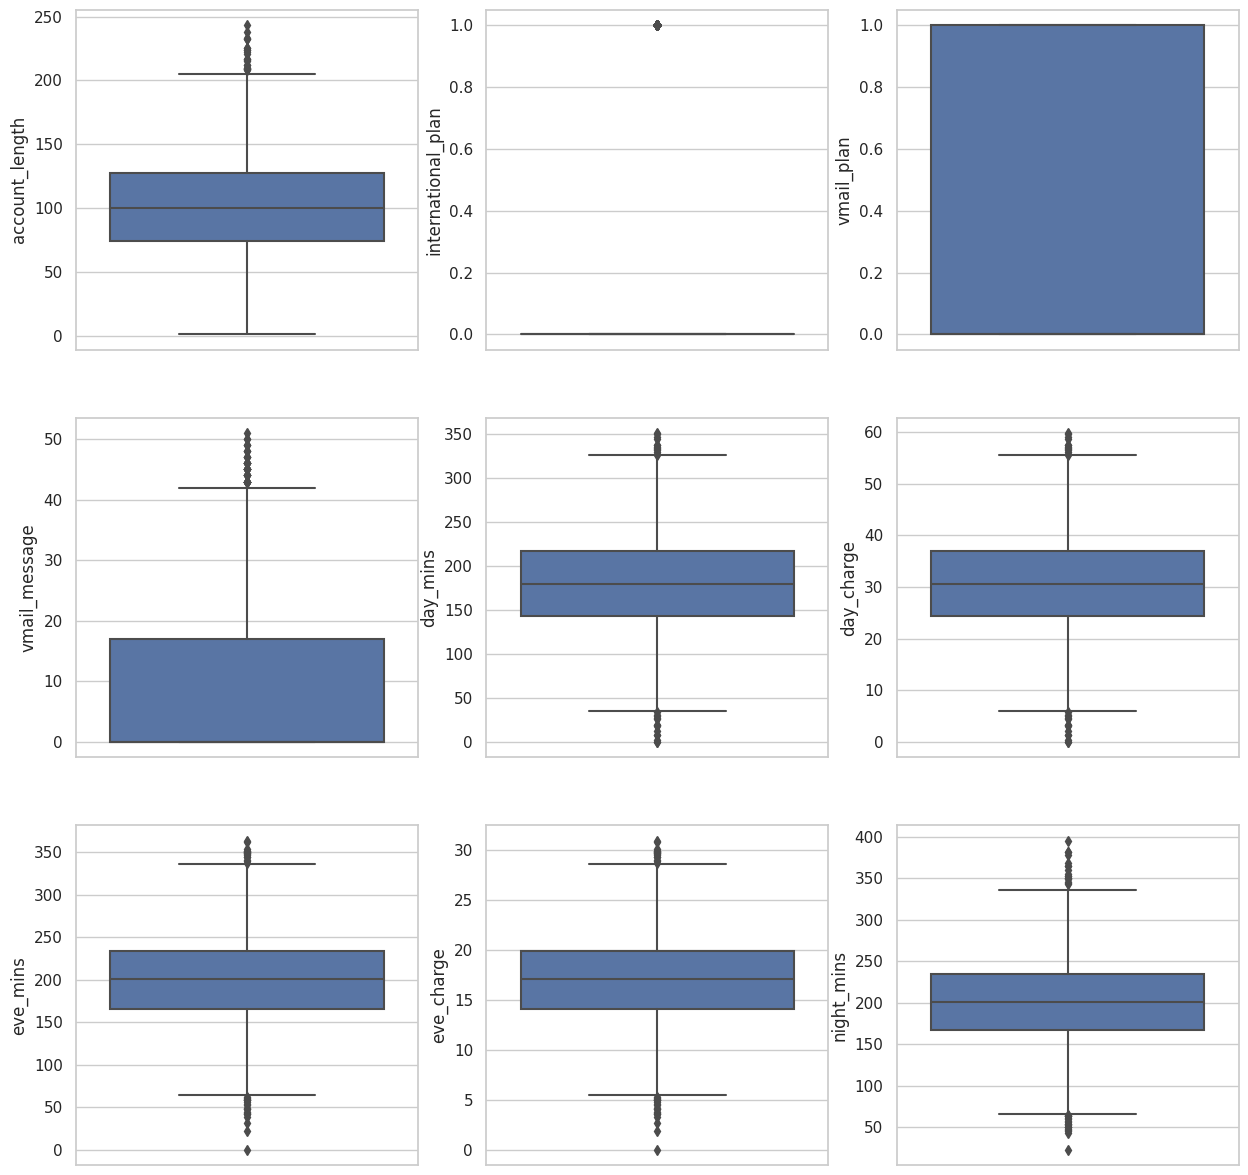

In [ ]:
plt.figure(figsize=(15,15))
plt_num = 1

churn_data_bp = churn_data.columns
churn_data_bp = churn_data_bp.drop(["state", "churn"])

for column in churn_data_bp:
    if plt_num <= 9:
        plt.subplot(3,3,plt_num)
        sns.boxplot(y=churn_data[column])
    plt_num+=1
plt.show()

* **The outliers are not in extreme cases. there fore extensive analysis can be deemed unnecessary.**

## Feature Engineering

### split data into x and y

In [29]:
x = churn_data.drop(['churn'], axis=1)
y = churn_data['churn']

### Feature Scaling

In [30]:
#STANDARD SCALER
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [31]:
x

Output hidden; open in https://colab.research.google.com to view.

In [32]:
x_scaled = std.fit_transform(x)
x_scaled = pd.DataFrame (x_scaled, columns = ['state','account_length','international_plan','vmail_plan','vmail_message','day_mins','day_charge','eve_mins','eve_charge','night_mins','night_charge','international_mins','international_charge', 'custserv_calls'])

In [33]:
churn_data_scaled = pd.concat([x_scaled.reset_index(drop=True), y.reset_index(drop = True)],axis=1)

In [ ]:
churn_data_scaled

Output hidden; open in https://colab.research.google.com to view.

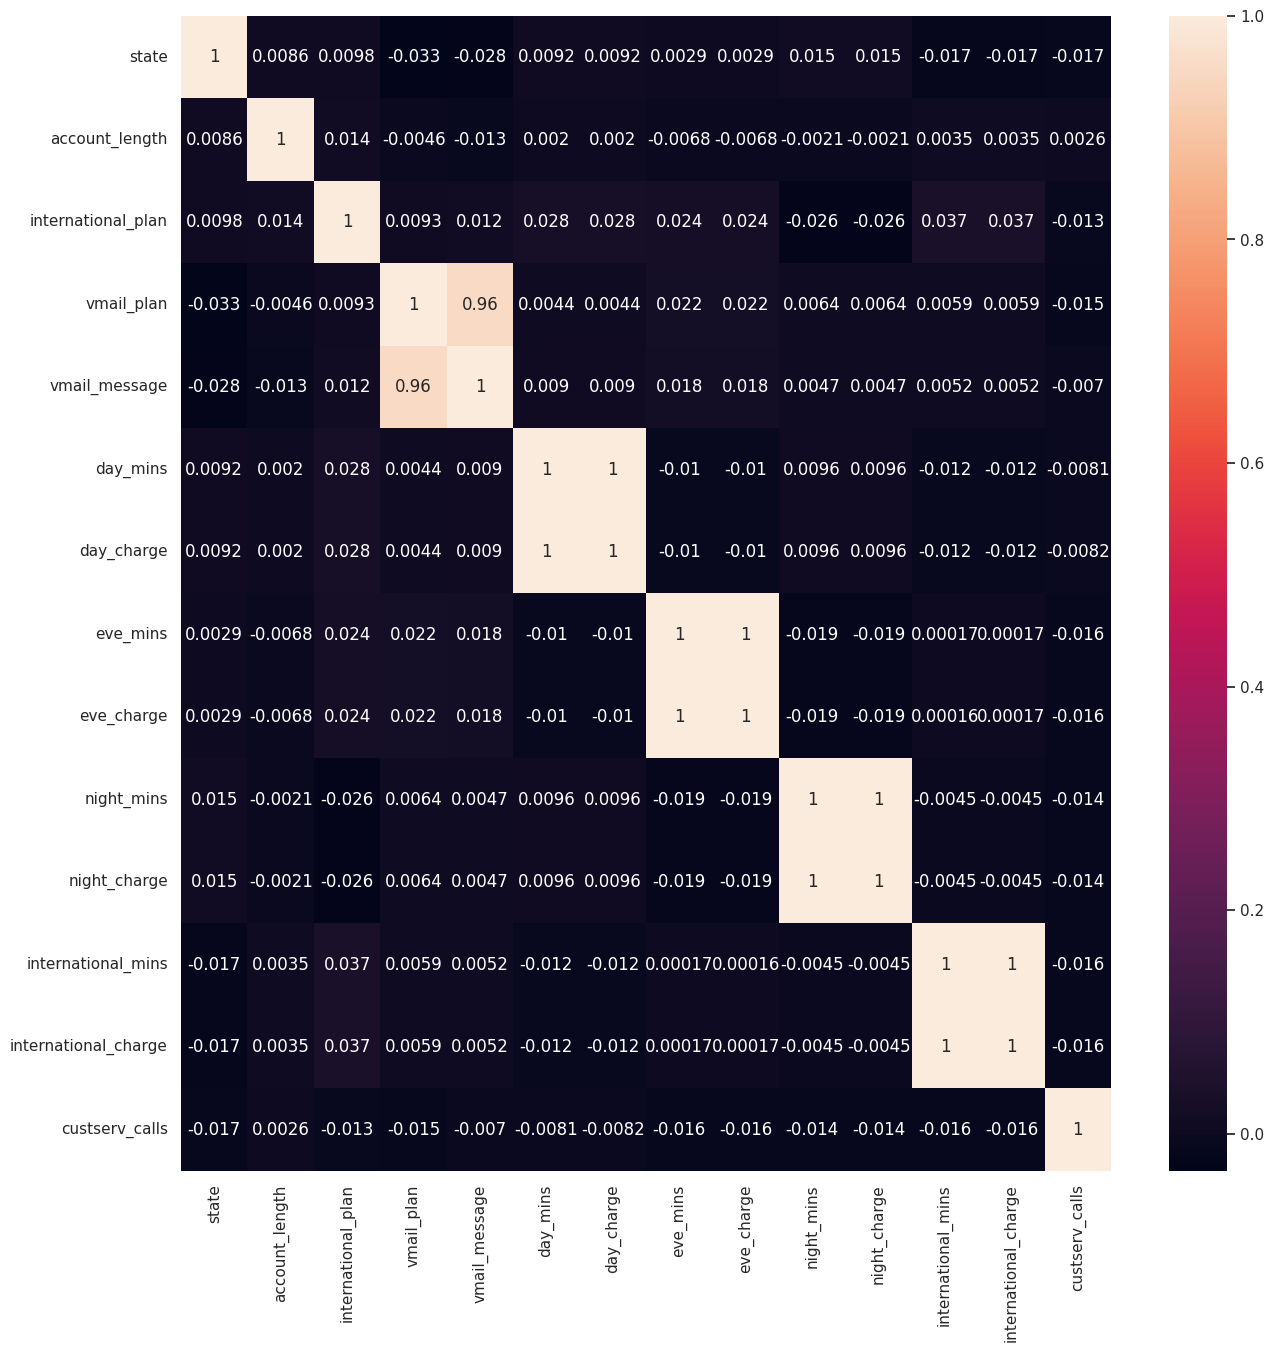

In [ ]:
# 1. CORRELATION
plt.figure(figsize=(15,15))
sns.heatmap(x_scaled.corr(), annot=True)
plt.show()

* **here the highly correlated features except 4 features.**

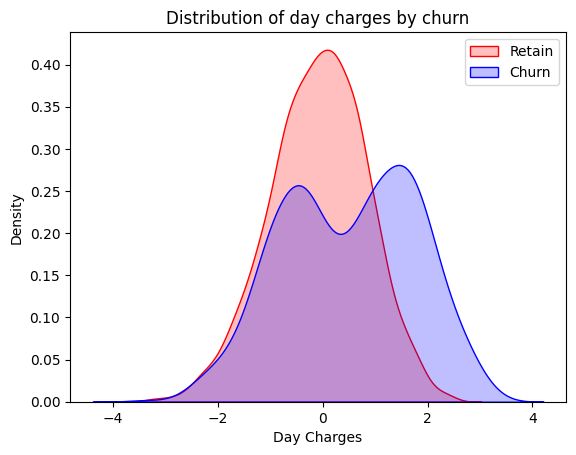

In [34]:
ax = sns.kdeplot(churn_data_scaled[churn_data_scaled.churn== False]['day_charge'],
               color = "Red", fill=True)
ax = sns.kdeplot(churn_data_scaled[churn_data_scaled.churn== True]['day_charge'],
               color = "Blue", fill=True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

# Display the plot
plt.show()

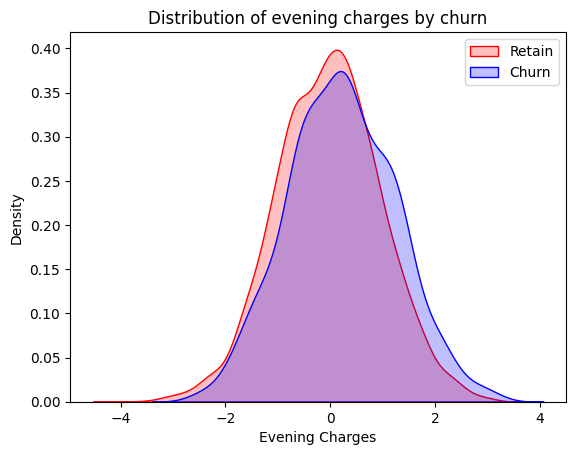

In [35]:
ax = sns.kdeplot(churn_data_scaled[churn_data_scaled.churn== False]['eve_charge'],
               color = "Red", fill=True)
ax = sns.kdeplot(churn_data_scaled[churn_data_scaled.churn== True]['eve_charge'],
               color = "Blue", fill=True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

plt.show()

In [36]:
# 2. Variance threshold
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import VarianceThreshold as vt

In [37]:
x_train_vt, x_test_vt, y_train_vt, y_test_vt = tts(x_scaled, y , test_size = 0.2, random_state = 42)
v_t = vt(threshold = 0.1)
v_t.fit(x_train_vt)
v_t.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

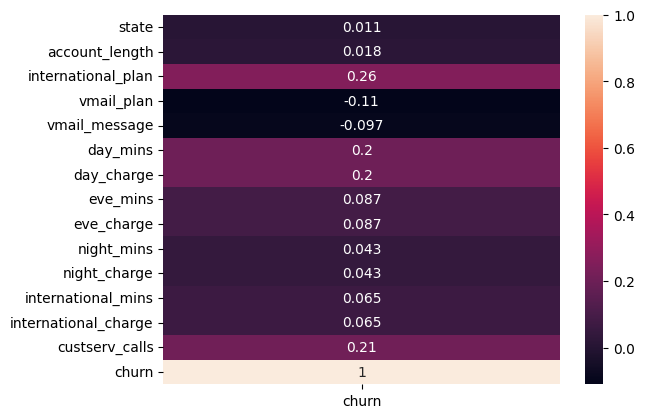

In [38]:
sns.heatmap(churn_data_scaled.corr()[["churn"]], annot=True)
plt.show()

* **In variance threshold feature reduction method there is no corelation to the churn data.**

In [39]:
# 3. information gain
from sklearn.feature_selection import mutual_info_classif
information_gain = mutual_info_classif(x_scaled, y)

In [40]:
important_feature = pd.DataFrame({'Feature':x_scaled.columns, 'Information Gain' : information_gain})
important_feature = important_feature.sort_values(by= 'Information Gain', ascending=False)
important_feature

,Feature,Information Gain
5,day_mins,0.055530
6,day_charge,0.054090
13,custserv_calls,0.035881
2,international_plan,0.020955
0,state,0.010051
4,vmail_message,0.007422
3,vmail_plan,0.007141
11,international_mins,0.005923
12,international_charge,0.005443
10,night_charge,0.004192


* **In Information gain there are three features that are less inclusive for the output of the model. account_length, eve_mins, night_mins.**

In [41]:
# 4. chi square test
from sklearn.feature_selection import SelectKBest, chi2

In [42]:
churn_chi = SelectKBest(chi2, k=11)

In [43]:
churn_chi_bf = churn_chi.fit_transform(x,y)

In [44]:
churn_chi_bf_indices = churn_chi.get_support(indices = True)
#print(x.columns[[churn_chi_bf_indices]])

In [45]:
x.columns.to_numpy()[churn_chi_bf_indices]

array(['account_length', 'international_plan', 'vmail_plan',
       'vmail_message', 'day_mins', 'day_charge', 'eve_mins',
       'eve_charge', 'night_mins', 'international_mins', 'custserv_calls'],
      dtype=object)

* **Comparing the four above feature elimination methods to reduce the features for better modelling. all have different outcomes of decisions. considering correlation and information gain "eve_mins" and "night_mins" will be eliminated**

In [46]:
churn_data_scaled = churn_data_scaled.drop(['eve_mins','night_mins'], axis=1)

In [47]:
churn_data_scaled.head(5)

,state,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_charge,eve_charge,night_charge,international_mins,international_charge,custserv_calls,churn
0,-0.679001,0.690901,-0.327000,1.653916,1.261885,1.568293,1.568569,-0.059742,0.871418,-0.101301,-0.102005,-0.433885,0
1,0.605758,0.160503,-0.327000,1.653916,1.335463,-0.349166,-0.349447,-0.096978,1.064889,1.240707,1.241481,-0.433885,0
2,0.335283,0.918214,-0.327000,-0.604626,-0.577587,1.166275,1.166439,-1.567818,-0.751101,0.696649,0.690651,-1.199068,0
3,0.605758,-0.420409,3.058107,-0.604626,-0.577587,2.203741,2.203911,-2.740765,-0.073952,-1.334498,-1.338013,0.331298,0
4,0.673377,-0.647723,3.058107,-0.604626,-0.577587,-0.254682,-0.254636,-1.030217,-0.271820,-0.065031,-0.061701,1.096480,0


### split data into x and y

In [48]:
#splitting the data
x_train, x_test, y_train, y_test = tts(x_scaled, y, test_size = 0.2, random_state=42)

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install --upgrade imbalanced-learn

### Balancing the Classes of Target Variables

In [49]:
#oversampling
from imblearn.over_sampling import  SMOTE
smote=SMOTE()

In [50]:
xsmote, ysmote = smote.fit_resample(x_train, y_train)

In [51]:
ysmote.value_counts()

1    3162
0    3162
Name: churn, dtype: int64

# Model Building

## 1. Support Vector Classifier

In [52]:
from sklearn.svm import SVC
svm = SVC()

In [53]:
svm.fit(xsmote, ysmote)

SVC()

In [54]:
y_train_pred_SVC=svm.predict(xsmote)
y_test_pred_SVC=svm.predict(x_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [56]:
#Evaluate SVC model:
print("SVC training set score:", accuracy_score(ysmote, y_train_pred_SVC))
print("SVC test set score:", accuracy_score(y_test, y_test_pred_SVC))

SVC training set score: 0.9133459835547122
SVC test set score: 0.8820346320346321


In [57]:
# Classification Report of Support Vector Classifier Model
print(classification_report(y_test, y_test_pred_SVC))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       799
           1       0.54      0.78      0.64       125

    accuracy                           0.88       924
   macro avg       0.75      0.84      0.79       924
weighted avg       0.91      0.88      0.89       924



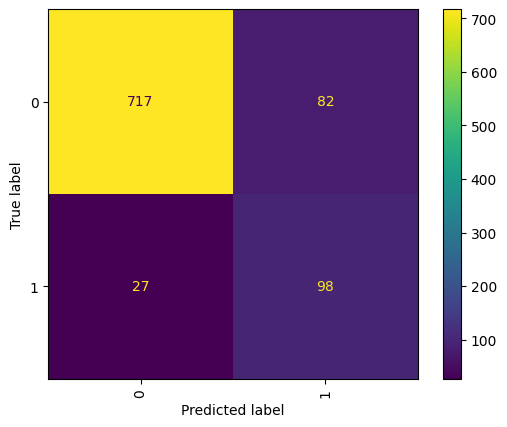

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_SVC, xticks_rotation='vertical')

### Hyperparameter tuning in Support Vector Classifier Model

In [93]:
# Defining Parameters' ranges for Tuning
params_SVM_CLF= {'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.0001],
            'random_state':list(range(1,20)),'kernel':['rbf','poly','sigmoid','linear']}

In [95]:
# %%time
from sklearn.model_selection import RandomizedSearchCV
random_search_SVM_CLF= SVC()
random_search_SVM_CLF = RandomizedSearchCV(random_search_SVM_CLF, params_SVM_CLF,cv=5,scoring='accuracy',n_jobs=-1)

random_result_SVM_CLF= random_search_SVM_CLF.fit(xsmote, ysmote)
print('Best Params: ', random_result_SVM_CLF.best_params_)

Best Params:  {'random_state': 11, 'kernel': 'poly', 'gamma': 0.1, 'C': 0.1}


In [96]:
SVM_CLF_Tuned = SVC(C=0.1, gamma=0.1, kernel= 'poly', random_state=11)
SVM_CLF_Tuned.fit(xsmote, ysmote)

SVC(C=0.1, gamma=0.1, kernel='poly', random_state=11)

In [97]:
y_train_pred_SVM_CLF_Tuned= SVM_CLF_Tuned.predict(xsmote) # training model
y_test_pred_SVM_CLF_Tuned = SVM_CLF_Tuned.predict(x_test) # testing model

In [98]:
#Evaluate Tuned KNN Classifier model:
print("SVC Tuned training set score:", accuracy_score(ysmote, y_train_pred_SVM_CLF_Tuned))
print("SVC Tuned test set score:", accuracy_score(y_test, y_test_pred_SVM_CLF_Tuned))

SVC Tuned training set score: 0.8893105629348513
SVC Tuned test set score: 0.8885281385281385


In [99]:
# Classification Report of Support Vector Classifier Model
print(classification_report(y_test, y_test_pred_SVM_CLF_Tuned))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       799
           1       0.57      0.74      0.64       125

    accuracy                           0.89       924
   macro avg       0.76      0.83      0.79       924
weighted avg       0.91      0.89      0.89       924



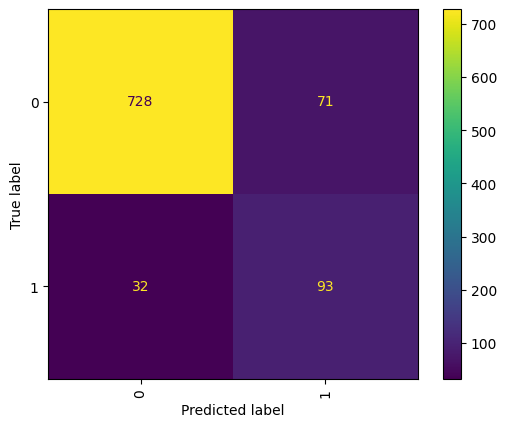

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_SVM_CLF_Tuned, xticks_rotation='vertical')

## 2. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression()
Log_Reg.fit(xsmote, ysmote)

LogisticRegression()

In [60]:
# MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
y_train_pred_Log_Reg = Log_Reg.predict(xsmote) # training model
y_test_pred_Log_Reg = Log_Reg.predict(x_test) # testing model

In [61]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score:" , accuracy_score(ysmote, y_train_pred_Log_Reg))
print("Logistic Regression test set score:" , accuracy_score(y_test, y_test_pred_Log_Reg))

Logistic Regression training set score: 0.7912713472485768
Logistic Regression test set score: 0.7510822510822511


In [62]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_test_pred_Log_Reg))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       799
           1       0.33      0.78      0.46       125

    accuracy                           0.75       924
   macro avg       0.64      0.76      0.65       924
weighted avg       0.87      0.75      0.79       924



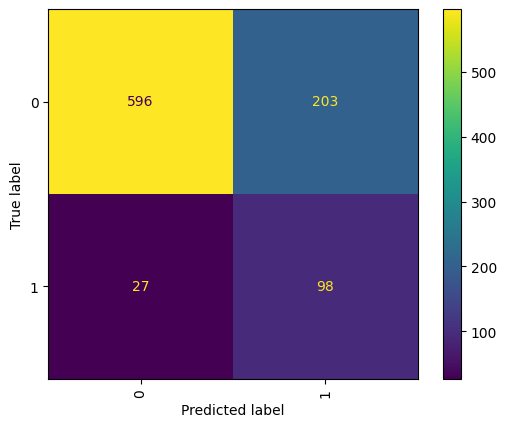

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_Log_Reg, xticks_rotation='vertical')

### Hyperparameter tuning in Logistic Regression Model

In [101]:
Log_Reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [104]:
# Defining Parameters' ranges for Tuning
params_Log_Reg = {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.arange(0.01, 1.5, 0.01),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 200, 300],
    'class_weight' :['balanced', None],
    'multi_class' :['auto', 'ovr', 'multinomial']}

In [ ]:
# %%time
from sklearn.model_selection import  GridSearchCV
grid_search_Log_Reg = LogisticRegression()
grid_search_Log_Reg = GridSearchCV(grid_search_Log_Reg, params_Log_Reg,cv=5,scoring='accuracy',n_jobs=-1)

grid_result_Log_Reg = grid_search_Log_Reg.fit(xsmote, ysmote)
print('Best Params: ', grid_result_Log_Reg.best_params_)

In [ ]:
Log_Reg_Tuned = LogisticRegression(C=0.02,class_weight='balanced',max_iter=100,multi_class='auto',penalty='l2',solver='liblinear')
Log_Reg_Tuned.fit(xsmote, ysmote)

In [ ]:
y_train_pred_Log_Reg_Tuned = Log_Reg_Tuned.predict(xsmote) # training model
y_test_pred_Log_Reg_Tuned = Log_Reg_Tuned.predict(x_test) # testing model

In [ ]:
#Evaluate Logistic Regression model:
print("Logistic Regression training set score:", accuracy_score(ysmote, y_train_pred_Log_Reg_Tuned))
print("Logistic Regression test set score:", accuracy_score(y_test, y_test_pred_Log_Reg_Tuned))

In [ ]:
print(classification_report(y_test, y_test_pred_Log_Reg_Tuned))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_Log_Reg_Tuned, xticks_rotation='vertical')

## 3. Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
DTC = DecisionTreeClassifier()
DTC.fit(xsmote, ysmote)

DecisionTreeClassifier()

In [66]:
y_train_pred_DTC = DTC.predict(xsmote)
y_test_pred_DTC = DTC.predict(x_test)

In [67]:
#Evaluate DTC model:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
print("DTC training set score:", accuracy_score(ysmote, y_train_pred_DTC))
print("DTC test set score:",  accuracy_score(y_test, y_test_pred_DTC))

DTC training set score: 1.0
DTC test set score: 0.8809523809523809


In [68]:
# Classification Report of DTC Classfier Model
print(classification_report(y_test, y_test_pred_DTC))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       799
           1       0.54      0.75      0.63       125

    accuracy                           0.88       924
   macro avg       0.75      0.83      0.78       924
weighted avg       0.90      0.88      0.89       924



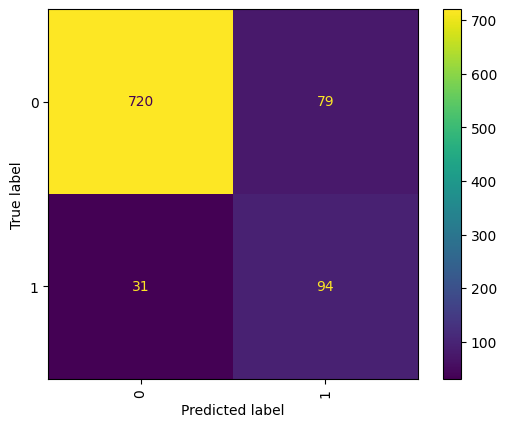

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DTC, xticks_rotation='vertical')

## 4. Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
RFC = RandomForestClassifier(random_state=42)
RFC.fit(xsmote, ysmote)

RandomForestClassifier(random_state=42)

In [72]:
y_train_pred_RFC=RFC.predict(xsmote)
y_test_pred_RFC=RFC.predict(x_test)

In [73]:
#Evaluate RF Classifier model:

print("RFC Classifier training set score:", accuracy_score(ysmote,y_train_pred_RFC))
print("RFC Classifier test set score:", accuracy_score(y_test, y_test_pred_RFC))

RFC Classifier training set score: 1.0
RFC Classifier test set score: 0.9242424242424242


In [74]:
# Classification Report of RF Classifier Model
print(classification_report(y_test, y_test_pred_RFC))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       799
           1       0.71      0.75      0.73       125

    accuracy                           0.92       924
   macro avg       0.83      0.85      0.84       924
weighted avg       0.93      0.92      0.93       924



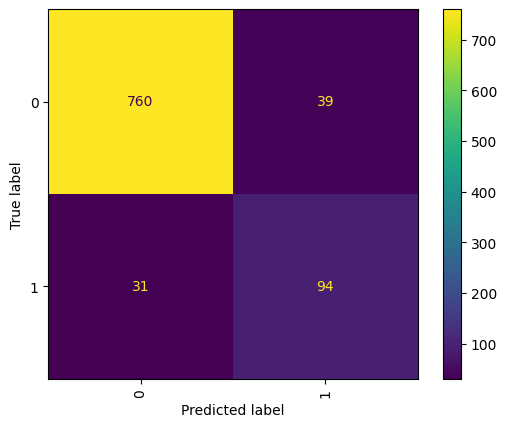

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_RFC, xticks_rotation='vertical')

## 5. Naive Bayes Classifier

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
nb = GaussianNB()
nb.fit(xsmote, ysmote)

GaussianNB()

In [78]:
y_train_pred_GNBC = nb.predict(xsmote) # training model
y_test_pred_GNBC = nb.predict(x_test)

In [79]:
#Evaluate Multinomial Naive Bayes model:
print("Multinomial Naive Bayes training set score:", accuracy_score(ysmote, y_train_pred_GNBC))
print("Multinomial Naive Bayes test set score:", accuracy_score(y_test, y_test_pred_GNBC))

Multinomial Naive Bayes training set score: 0.8032890575585073
Multinomial Naive Bayes test set score: 0.7781385281385281


In [80]:
# Classification Report of Multinomial Naive Bayes Model
print(classification_report(y_test, y_test_pred_GNBC))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       799
           1       0.36      0.80      0.49       125

    accuracy                           0.78       924
   macro avg       0.66      0.79      0.68       924
weighted avg       0.88      0.78      0.81       924



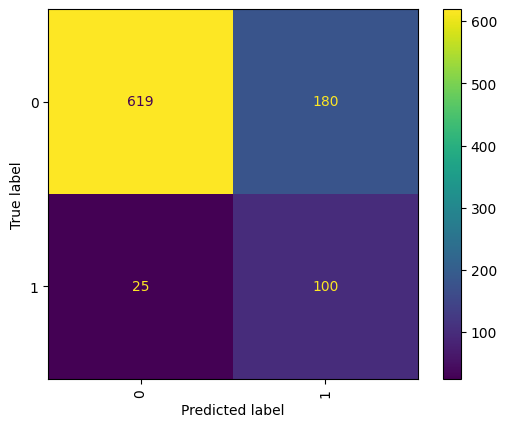

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_GNBC, xticks_rotation='vertical')

## 6. Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(xsmote, ysmote)

GradientBoostingClassifier(random_state=42)

In [84]:
y_train_pred_GBC = GBC.predict(xsmote)
y_test_pred_GBC= GBC.predict(x_test)

In [85]:
#Evaluate GBC model:
print("GBC training set score:", accuracy_score(ysmote,y_train_pred_GBC))
print("GBC test set score:", accuracy_score(y_test, y_test_pred_GBC))

GBC training set score: 0.9261543327008223
GBC test set score: 0.8939393939393939


In [86]:
# Classification Report of GBC Model
print(classification_report(y_test, y_test_pred_GBC))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       799
           1       0.58      0.82      0.68       125

    accuracy                           0.89       924
   macro avg       0.77      0.86      0.81       924
weighted avg       0.92      0.89      0.90       924



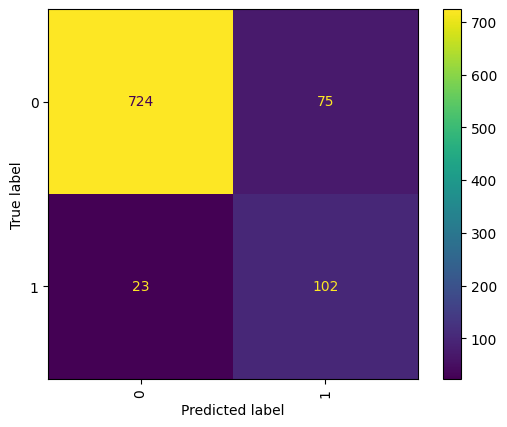

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_GBC, xticks_rotation='vertical')

## 7. XG Boost Classifier

In [88]:
XGB_CLF = XGBClassifier()
XGB_CLF.fit(xsmote, ysmote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_train_pred_XGB_CLF =XGB_CLF.predict(xsmote)
y_test_pred_XGB_CLF=XGB_CLF.predict(x_test)

In [90]:
#Evaluate XGB Classifier model:
print("XGB_CLF training set score:", accuracy_score(ysmote,y_train_pred_XGB_CLF))
print("XGB_CLF test set score:", accuracy_score(y_test, y_test_pred_XGB_CLF))

XGB_CLF training set score: 0.9993674889310563
XGB_CLF test set score: 0.9264069264069265


In [91]:
# Classification Report of XGB Classifier Model
print(classification_report(y_test, y_test_pred_XGB_CLF))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       799
           1       0.71      0.77      0.74       125

    accuracy                           0.93       924
   macro avg       0.84      0.86      0.85       924
weighted avg       0.93      0.93      0.93       924



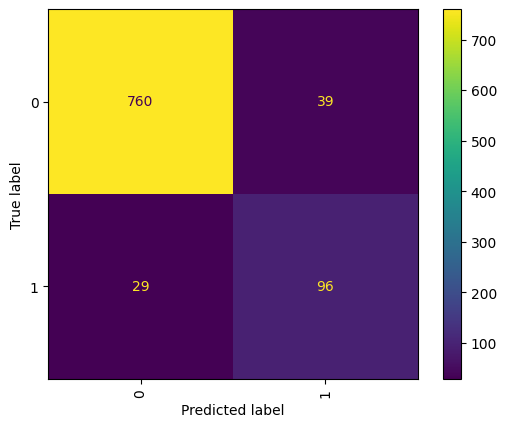

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_XGB_CLF, xticks_rotation='vertical')

## 9. Artificial Neural Networks Classifier

In [ ]:
# model creation
from sklearn.neural_network import MLPClassifier # MLP stands for Multi Layer Perceptron
ANN_CLF = MLPClassifier()
ANN_CLF.fit(xsmote,ysmote)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
y_train_pred_ANN_CLF= ANN_CLF.predict(xsmote)
y_test_pred_ANN_CLF= ANN_CLF.predict(x_test)

In [ ]:
# Evaluate ANN Classifier model:

print("ANN training set score:", accuracy_score(ysmote, y_train_pred_ANN_CLF))
print("ANN test set score:", accuracy_score(y_test, y_test_pred_ANN_CLF))

In [ ]:
# Classification Report of ANN Classifier Model
print(classification_report(y_test, y_test_pred_ANN_CLF))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ANN_CLF, xticks_rotation='vertical')

In [ ]:
ANN_CLF.get_params()

In [ ]:
# Defining Parameters' ranges for Tuning
params_ANN = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive']
             }

In [ ]:
# %%time
from sklearn.model_selection import  GridSearchCV
grid_search_ANN = MLPClassifier()
grid_search_ANN = GridSearchCV(grid_search_ANN,params_ANN,cv=5,scoring='accuracy',n_jobs=-1)

grid_result_ANN = grid_search_ANN.fit(xsmote, ysmote)
print('Best Params: ', grid_result_ANN.best_params_)

In [ ]:
ANN_CLF_Tuned = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes =(50,100,50), learning_rate='constant', solver='adam')
ANN_CLF_Tuned.fit(xsmote,ysmote)

In [ ]:
y_train_pred_ANN_CLF_Tuned= ANN_CLF_Tuned.predict(xsmote)
y_test_pred_ANN_CLF_Tuned= ANN_CLF_Tuned.predict(x_test)

In [ ]:
# Evaluate Tuned ANN Classifier model:

print("ANN_Tuned training set score:", accuracy_score(ysmote, y_train_pred_ANN_CLF_Tuned))
print("ANN_Tuned test set score:", accuracy_score(y_test, y_test_pred_ANN_CLF_Tuned))

In [ ]:
# Classification Report of Tuned ANN Classifier Model
print(classification_report(y_test, y_test_pred_ANN_CLF_Tuned))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ANN_CLF_Tuned, xticks_rotation='vertical')

In [ ]:
Model_Comparison= pd.DataFrame({'Model':['Support Vector Classifier(Tuned)',
                                         'Logistic Regression(Tuned)',
                                         'Decision Tree Classifier',
                                         'Random Forest Classifier',
                                         'Naive Bayes Classifier',
                                         'Gradient Boosting Classifier',
                                         'XG Boosting Classifier',
                                         'ANN Classifier(Tuned)'],

                                'Train Score':[accuracy_score(ysmote, y_train_pred_SVM_CLF_Tuned),
                                               accuracy_score(ysmote, y_train_pred_Log_Reg_Tuned),
                                               accuracy_score(ysmote, y_train_pred_DTC),
                                               accuracy_score(ysmote, y_train_pred_RFC),
                                               accuracy_score(ysmote, y_train_pred_GNBC),
                                               accuracy_score(ysmote,y_train_pred_GBC),
                                               accuracy_score(ysmote,y_train_pred_XGB_CLF),
                                               accuracy_score(ysmote, y_train_pred_ANN_CLF_Tuned)],
                                'Test Score':[accuracy_score(y_test, y_test_pred_SVM_CLF_Tuned),
                                              accuracy_score(y_test, y_test_pred_Log_Reg_Tuned),
                                              accuracy_score(y_test, y_test_pred_DTC),
                                              accuracy_score(y_test, y_test_pred_RFC),
                                              accuracy_score(y_test, y_test_pred_GNBC),
                                              accuracy_score(y_test, y_test_pred_GBC),
                                              accuracy_score(y_test, y_test_pred_XGB_CLF),
                                              accuracy_score(y_test, y_test_pred_ANN_CLF_Tuned)]})
Model_Comparison.index+=1
Model_Comparison

* **XG BOOST model even offeres the better accuracy score for the churn 0,1 data**

In [ ]:
import matplotlib.pyplot as plt

# Get the data from the dataframe
model_names = Model_Comparison['Model'].tolist()
train_scores = Model_Comparison['Train Score'].tolist()
test_scores = Model_Comparison['Test Score'].tolist()
plt.figure(figsize=(12,6))
# Plot the data
plt.plot(model_names, train_scores, label='Train Score', color='#0590DA')
plt.plot(model_names, test_scores, label='Test Score', color='#FF6600')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.700, 1.05)
plt.title('Comparison between Train and Test Scores of each Classification Model')
plt.show()

## INSIGHTS FROM CLASSIFICATION MODELS:


### Model-1: Support Vector Classifier
* **For Support Vector classifer model, the  accuracy score for train and test data were 0.986 and 0.891 respectively.**

### Model-2: Logistic Classifier
* **For the tuned Logistic classifer model, the  accuracy score for train and test data were 0.789 and 0.742 respectively.**

### Model-3: Desicion Tree Classifier
* **For Desicion Tree classifer model, the  accuracy score for train and test data were 1 and 0.874 respectively.**

### Model-4: Random Forest Classifier
* **For Random Forest classifer model, the  accuracy score for train and test data were 1 and 0.926 respectively.**

### Model-5: Naive Bayes Classifier
* **For Random Forest classifer model, the  accuracy score for train and test data were 0.801 and 0.784 respectively.**

### Model-6: Gradient Boost Classifier
* **For Gradient Boost classifer model, the  accuracy score for train and test data were 0.927 and 0.895 respectively.**

### Model-7: XGB Classifier
* **For XGB classifer model, the  accuracy score for train and test data were 0.999 and 0.931 respectively.**

### Model-8: Artificial Neural Networks Classifier
* **For ANN Classifier, the accuracy score for the train and test dataset were 0.999 and 0.912 respectively.**

_All the models have been compared for accuracy score and f1 score._

## Conclusion

* **Target class count plot showed imbalanced values between diffrent classes which was balanced using SMOTE.**


* **The 8 machine learning models have been studied and tuned and evaluated for acheiving better performance of the model using various metrices and accuracy scores.**


* **Both Random Forest classifier Model and XG Boosting Classifier Model have given the better accuracy Score and F1 Score compared to other classifier models but as XG Boost Classifier give better accuracy than Random forest we recommend to use XG Boost Classifier for the company benifits.**


* **Keeping in mind that achieving much better results is possible considering how the data was collected and how little there is to do with the cleaning process. The well-served data has contributed significantly to the improved performance of these models.**

## CHALLENGES FACED:

**1. The number of people who opt out are less and it causes a huge imbalance in the churn data, we use smote to level it.**

**2. Feature selection, as the data is well cleaned and proper, it was hard to eliminate even the two features even after careful consideration.**

**3. Grid.fit to find the best fit, had to be aware of the number of iterations as the computaional power was more and taking a long time.**